In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
x_train = pd.read_csv('c:/Users/nishant/Chemical Classifier/Training Data/Logistic_X_Train.csv').values
y_train = pd.read_csv('c:/Users/nishant/Chemical Classifier/Training Data/Logistic_Y_Train.csv').values
x_test = pd.read_csv('c:/Users/nishant/Chemical Classifier/Test Cases/Logistic_X_Test.csv').values

In [119]:
x_train.shape

(3000, 3)

In [120]:
y_train.shape

(3000, 1)

In [126]:
def normalize(arr):
    arr = (arr - arr.mean(axis=0))/(arr.std(axis=0))
    
    return arr

In [127]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# Logistic Regression

In [177]:
def sigmoid(z):
    
    return 1.0 / (1.0 + np.exp(-z))

def hypothesis(x,theta):
    
    return sigmoid(np.dot(x,theta))

In [185]:
def error(x,y,theta):
    hi = hypothesis(x,theta)
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))

    return e

In [181]:
def gradient(x,y,theta):
    h = hypothesis(x,theta)
    grad = np.dot(x.T,(y-h))
    m = x.shape[0]
    return grad/m
    
def gradient_descent(x,y,lr=0.1,max_iter = 1000):
    
    theta = np.zeros((x.shape[1],1))
    error_list = []
    for i in range(max_iter):
        e = error(x,y,theta)
        error_list.append(e)
        grad = gradient(x,y,theta)
        
        theta = theta + lr*grad
        
    return error_list,theta

In [139]:
def add_ones(x):
    ones = np.ones((x.shape[0],1))
    x = np.hstack((ones,x))
    return x

In [140]:
x_train = add_ones(x_train)
x_test = add_ones(x_test)

In [186]:
e,theta = gradient_descent(x_train,y_train)

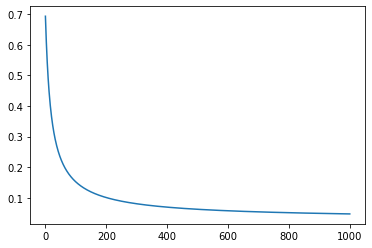

In [188]:
plt.plot(e)
plt.show()

In [184]:
theta

array([[-0.5300282 ],
       [-3.16823469],
       [ 1.84554244],
       [-2.59861463]])

In [ ]:
def predict(x,theta):
    h = hypothesis(x,theta)
    
    